In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def load_data():
  data = pd.read_csv('/content/iris.data',names=['s_lenght', 's_width', 'p_length', 'p_width', 'iris_class'])
  data.drop(['p_length', 'p_width'], axis=1, inplace=True)
  data = data[data.iris_class != 'Iris-versicolor']
  data["iris_class"].replace({"Iris-setosa": 0., "Iris-virginica": 1.}, inplace=True)
  X_train, X_test, y_train, y_test = train_test_split(data.iloc[ : , 0:-1], data.iloc[ : , -1], stratify=data['iris_class'], test_size=0.2, random_state=2020)
  return X_train, X_test, y_train, y_test

def init_weights(size):
  return np.array(np.random.rand(X_train.shape[1]), dtype='float64')

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

def compute_loss(y_, y, size):
  return -1/size * np.sum(y * np.log(y_)) + (1 - y) * np.log(1-y_)

def update_weight(x, y, y_, lr, size):
   return lr * (1/size * np.dot(x.T, (y_ - y)))

def update_bias(y, y_, lr, size):
  return lr * (1/size * np.sum(y_ - y))

def normalization(data):
  data = (data) / data.max()
  return data

def train(x, y, lr, epochs, weight, bias): 
    size = x.shape[0]
    for i in range(epochs): 
        weighted_sum = np.dot(x, weight) + bias
        y_ = sigmoid(weighted_sum)
        loss = compute_loss(y_, y, size)
        loss_log.append(loss)
        weight = weight - update_weight(x, y, y_, lr, size)
        bias = bias - update_bias(y, y_, lr, size)
    return np.hstack([bias, weight])

def decision_boundary(x, weight, bias):
  return - (bias + np.dot(weight[0], x)) / weight[1]

def predict(model, x):
    return sigmoid(np.dot(x, model[1:]) + model[0])

def mse(y_, y):
  diff = np.subtract(y_, y)
  ms = np.power(diff, 2, dtype='float64')
  return np.mean(ms)

X_train, X_test, y_train, y_test = load_data()
weights = init_weights(X_train.shape[1])

X_train = X_train.to_numpy(dtype='float64')
X_test = X_test.to_numpy(dtype='float64')
y_train = y_train.to_numpy(dtype='float64')
y_test = y_test.to_numpy(dtype='float64')

# X_train = normalization(X_train)
# X_test = normalization(X_test)

loss_log = []
model = train(X_train, y_train, 0.02, 10000, weights , 0)
model

array([-1.84068029,  3.74906738, -6.11761313])

In [25]:
print("MSE Train = ", mse(predict(model, X_train), y_train))
print("MSE Test  = ", mse(predict(model, X_test), y_test))

MSE Train =  0.012259941193327703
MSE Test  =  0.00109176933208449


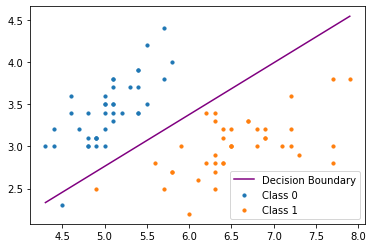

In [26]:
import matplotlib.pyplot as plt

x_values = pd.DataFrame(data=X_train, columns=["column1", "column2"])
y_values = pd.DataFrame(data=y_train, columns=["classes"])

result = pd.concat([x_values, y_values], axis=1, sort=False)
class0 = result[result.classes == 0]
class1 = result[result.classes == 1]


plt.scatter(class0.iloc[:,0], class0.iloc[:, 1], s=10, label='Class 0')
plt.scatter(class1.iloc[:,0], class1.iloc[:, 1], s=10, label='Class 1')
x_values = [np.min(x_values.iloc[:, 0]), np.max(x_values.iloc[:, 0])]
y_values = decision_boundary(x_values, model[1:], model[0])
plt.plot(x_values, y_values, label='Decision Boundary', color='purple')
plt.legend()
plt.show()

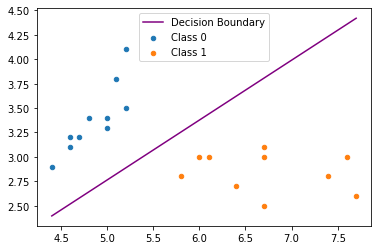

In [27]:
import matplotlib.pyplot as plt
x_values = pd.DataFrame(data=X_test, columns=["column1", "column2"])
y_values = pd.DataFrame(data=y_test, columns=["classes"])
result = pd.concat([x_values, y_values], axis=1, sort=False)
class0 = result[result.classes == 0]
class1 = result[result.classes == 1]


plt.scatter(class0.iloc[:,0], class0.iloc[:, 1], s=20, label='Class 0')
plt.scatter(class1.iloc[:,0], class1.iloc[:, 1], s=20, label='Class 1')
x_values = [np.min(x_values.iloc[:, 0]), np.max(x_values.iloc[:, 0])]
y_values = decision_boundary(x_values, model[1:], model[0])
plt.plot(x_values, y_values, label='Decision Boundary', color='purple')
plt.legend()
plt.show()